# First Machine Learning Project

### First step is to install or get required libraries<br>
<li>scipy</li>
<li>numpy</li>
<li>matplotlib</li>
<li>sklearn</li>
<li>pandas</li>

In [12]:
#import sys
#import scipy
#import numpy as np
#import pandas as pd
#import matplotlib
#import sklearn

In [15]:
#lets see what my workstation has
#print("python: {}".format(sys.version))
#print("scipy: {}".format(scipy.__version__))
#print("numpy: {}".format(np.__version__))
#print("matplotib: {}".format(matplotlib.__version__))
#print("sklearn: {}".format(sklearn.__version__))
#print("pandas: {}".format(pd.__version__))

python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.3.1
numpy: 1.17.2
matplotib: 3.1.1
sklearn: 0.21.3
pandas: 0.25.1


### Importing all the required libraries<br>
Importing all the modules, functions and objects we are going to use.

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading the data<br>
I am going to use available Iris dataset as this is the hello world dataset for machine learning.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_data = read_csv(url,names=names)

### Summarising the dataset<br>
1. Dimensions of the dataset.
2. Peek at the dataset.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variables.

#### 1. Dimension of the Dataset<br>
Dataset has 150 rows and 5 columns

In [3]:
#shape
print(iris_data.shape)

(150, 5)


#### 2. Peek at the dataset<br>
Lets see the firat 10 rows of the dataset.

In [4]:
#head
print(iris_data.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


#### 3. Statistical summary of all attributes.<br>
This will include count, mean, median, min, max, s.d and percentiles for all the numerical attributes.

In [5]:
# describe
print(iris_data.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


#### 4. Class Distribution
Lets look at the number of instances which belongs to each class.

In [6]:
print(iris_data.groupby("class").size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Each class has the same number of instances.

### Digging deeper into dataset with help of few visualisations
#### Univariate plots first<br>
We will see the each individual variables first, we can create box plots for each arttiribute to understand the data better.

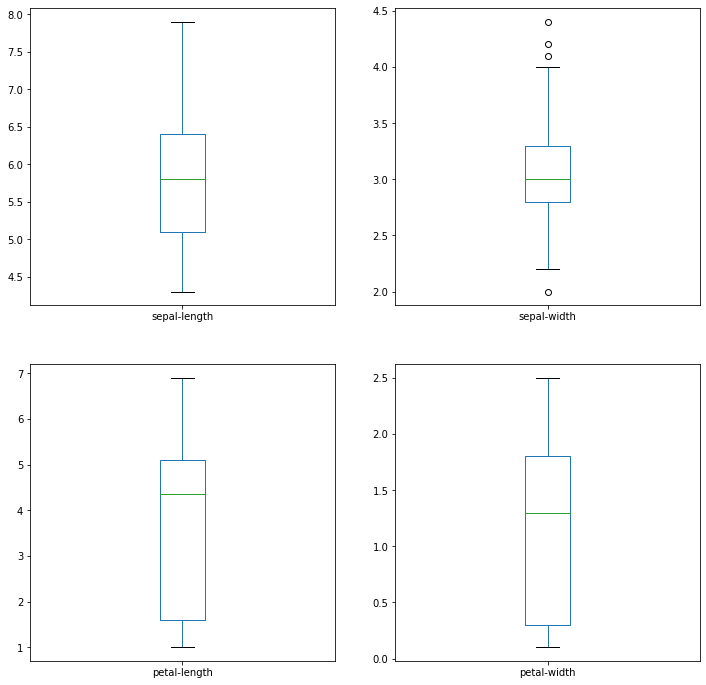

In [7]:
pyplot.rcParams["figure.figsize"] = (12,12)
iris_data.plot(kind="box",subplots=True,layout= (2,2), sharex= False, sharey= False)
pyplot.show()


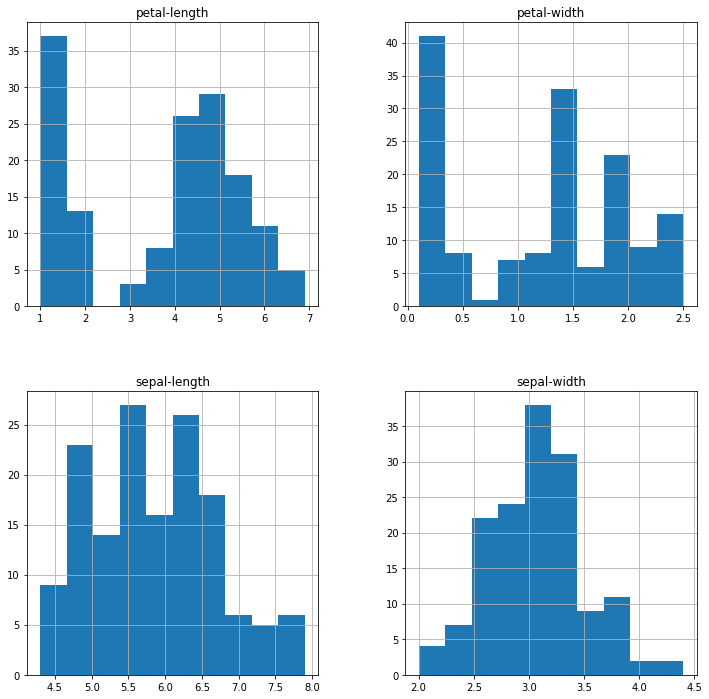

In [8]:
#Histogram to get more clear idea of distribution
iris_data.hist()
pyplot.show()

#### Multivariate Plots<br>
This will show us the basic correlation between attributes if there is any.

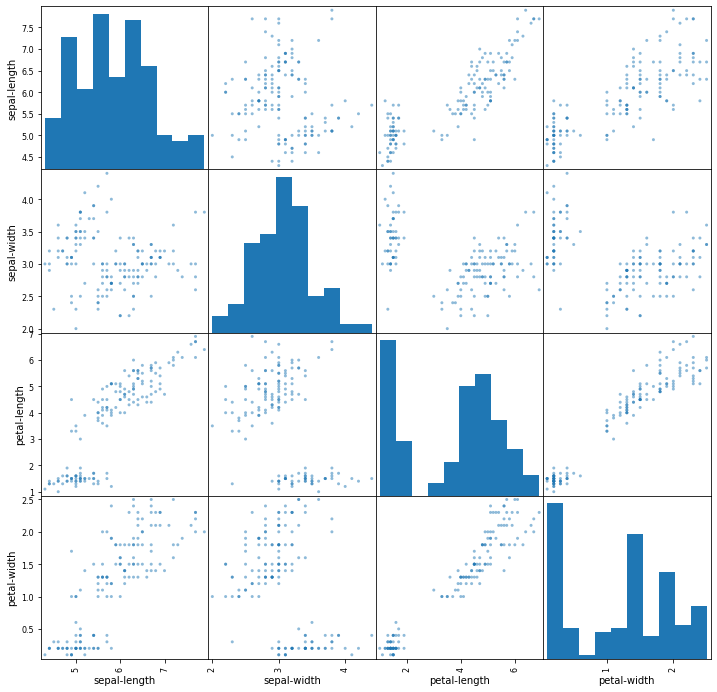

In [9]:
#scatter plot matrix
scatter_matrix(iris_data)
pyplot.show()

Above subplots are showing the high correlation and predictable relationship among different attributes.

## Creating Models and Evaluating them<br>
Step by step of what is going to happen next<br>
1. Seperating validation dataset
2. Setting up the test harness for 10-fold cross validation.
3. Build multiple different model to predict class/ species of flower from flower measurements.
4. Select the best model.

### 1. Create a Validation Set<br>
80% for training and 20% for validation

In [10]:
#split out validation dataset
array = iris_data.values
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size=0.20,random_state=1)

### 2. Testing Harness<br>
Using stratified 10-fold cross validation to estimate model accuracy.<br>
This process will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

### 3. Building Models<br>
We dont konw which algorithm will be good on this problem. Lets test 6 different algorithms.
<li>Logistic Regression</li>
<li>Linear Discriminant Analysis</li>
<li>K-Nearest Neighbour</li>
<li>Classification and Regression Trees</li>
<li>Gaussian Naive Bayes</li>
<li>Support Vector Machines</li>
<br>
Lets build models.

In [31]:
models =[]
models.append(("LR",LogisticRegression(solver="liblinear",multi_class="ovr")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC(gamma="auto")))
# evaluaating models
names=[]
results=[]

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results= cross_val_score(model, x_train, y_train,cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s : %f (%f)" %(name, cv_results.mean(), cv_results.std()))

LR : 0.951807 (0.052427)
LDA : 0.976923 (0.035251)
KNN : 0.951807 (0.052427)
CART : 0.945513 (0.060355)
NB : 0.952448 (0.062375)
SVM : 0.984615 (0.030769)


We can see from above that SVM has the higgest accuracy of 98.46%. 
<br>
### Make Predictions
Lets make predictions

In [38]:
model = SVC(gamma="auto")
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
predictions = model.predict(x_validation)

In [42]:
print(accuracy_score(predictions,y_validation))
print(confusion_matrix(predictions, y_validation))
print(classification_report(predictions,y_validation))

0.9666666666666667
[[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

